In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Functions import gen_Files
from sklearn.datasets import dump_svmlight_file, load_svmlight_file
from pylorentz import Momentum4

In [3]:
#From the TBranch data, create CSV's for ggH, data(A,B,C,D), and ggjj
gen_Files()

Tight condition: 0.78
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.77
Pt/Mass condition: 0.09
Overall: 0.97


C:\Users\jamie\CernOpenData\Code\Functions.ipynb:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "        #Perform the removal of rows, but if we are processing one of the raw data files\n",


Done data15.csv
Tight condition: 0.80
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.77
Pt/Mass condition: 0.09
Overall: 0.97
Done data16_p1.csv
Tight condition: 0.80
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.77
Pt/Mass condition: 0.09
Overall: 0.97
Done data16_p2.csv
Tight condition: 0.81
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.77
Pt/Mass condition: 0.09
Overall: 0.97
Done data16_p3.csv
Tight condition: 0.15
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.00
Pt/Mass condition: 0.02
Overall: 0.17
Done ggF_atlas.csv
Tight condition: 0.20
Ptratio condition: 0.00
Etratio condition: 0.00
Mass condition: 0.42
Pt/Mass condition: 0.09
Overall: 0.58
Done yyjj_p1.csv


In [3]:
#Open a file to access the different graphs
df1 = pd.read_csv('./../CSVfiles/data15_data.csv')
df2 = pd.read_csv('./../CSVfiles/data16_p1_data.csv')
df3 = pd.read_csv('./../CSVfiles/data16_p2_data.csv')
df4 = pd.read_csv('./../CSVfiles/data16_p3_data.csv')

df5 = pd.concat([df1,df2])
del df1,df2
df6 = pd.concat([df3,df4])
del df3,df4
df = pd.concat([df5,df6])
del df5,df6

df1 = pd.read_csv('./../CSVfiles/ggF_data.csv')
df2 = pd.read_csv('./../CSVfiles/yyjj_data.csv')

1046283


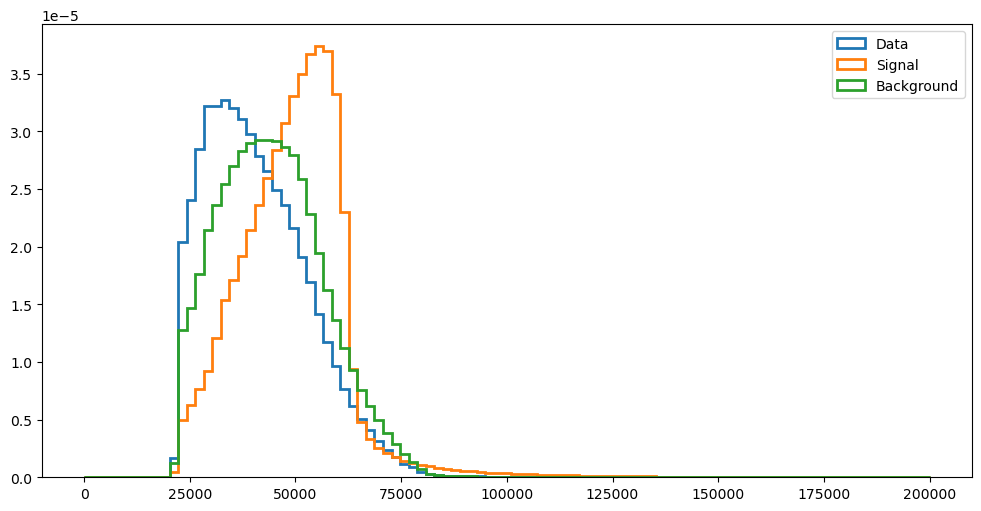

0


In [12]:
#Quick look at the data
print(len(df))
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 200000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(df['g2_pt'],bins = bins, density = True, histtype='step', linewidth=2,label='Data')
plt.hist(df1['g2_pt'],bins = bins, density = True, histtype='step', linewidth=2,label='Signal')
plt.hist(df2['g2_pt'],bins = bins, density = True, histtype='step', linewidth=2,label='Background')
plt.legend()
plt.show()

ratio1 = df['g1_pt']/df['p_mass']
ratio2 = df['g2_pt']/df['p_mass']

print(len(df[(ratio1<0.35) & (ratio2<0.25)].index))

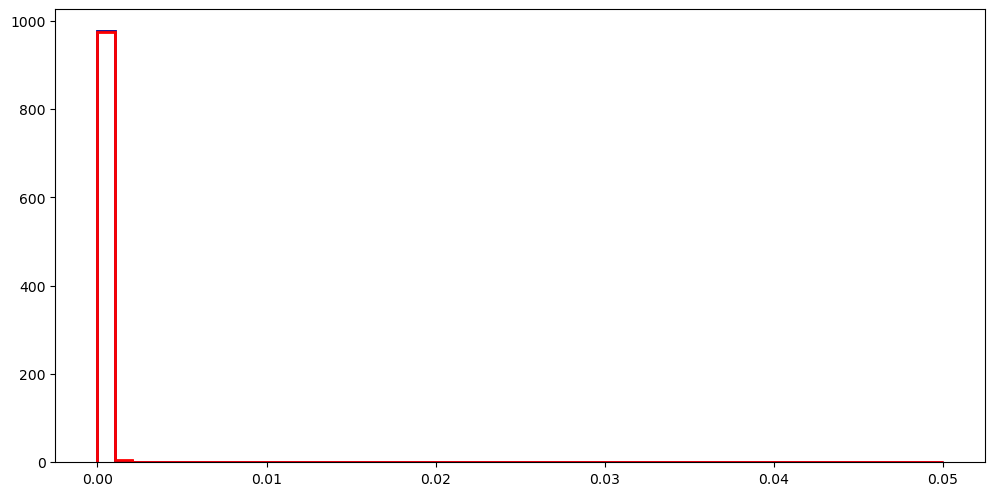

0.0
0.0


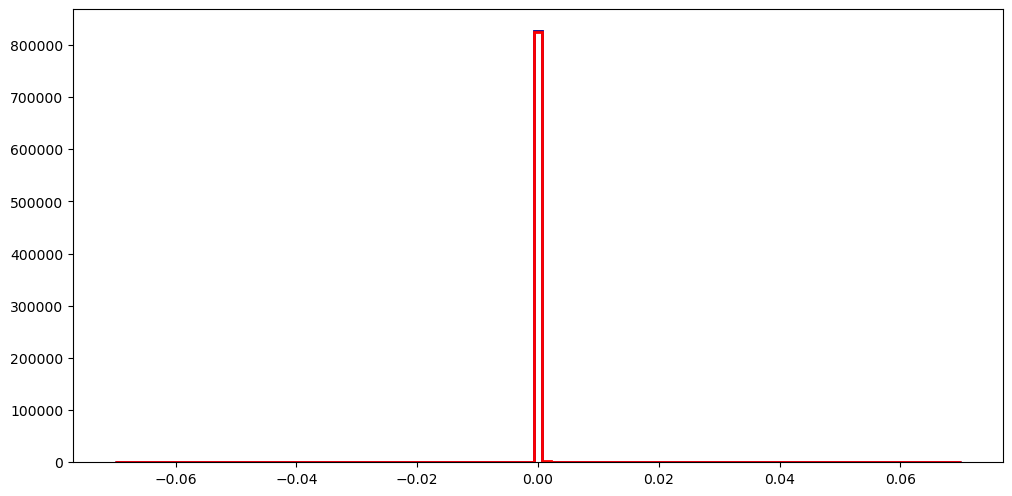

0.0
0.0


In [6]:
#For checkng ptcone, etacone
div1 = df3['g1_ptcone']/df3['g1_pt']
div2 = df3['g2_ptcone']/df3['g2_pt']
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0,0.05]
bins = np.linspace(xlims[0],xlims[1],50,endpoint=True)
plt.hist(div1, color = 'darkblue', bins=bins, density = True, histtype='step', linewidth=2)
plt.hist(div2, color = 'red', bins=bins, density = True,histtype='step', linewidth=2)
plt.show()

#percent background using this cut
print(((len(div1[div1>0.05]))/(len(div1)))*100)
print(((len(div2[div2>0.05]))/(len(div2)))*100)

div1 = df3['g1_etcone']/df3['g1_pt']
div2 = df3['g2_etcone']/df3['g2_pt']
plt.figure(figsize=(12,6), dpi= 100)
xlims=[-0.07,0.07]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(div1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(div2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

#percent background using this cut
print(((len(div1[div1>0.065]))/(len(div1)))*100)
print(((len(div2[div2>0.065]))/(len(div2)))*100)

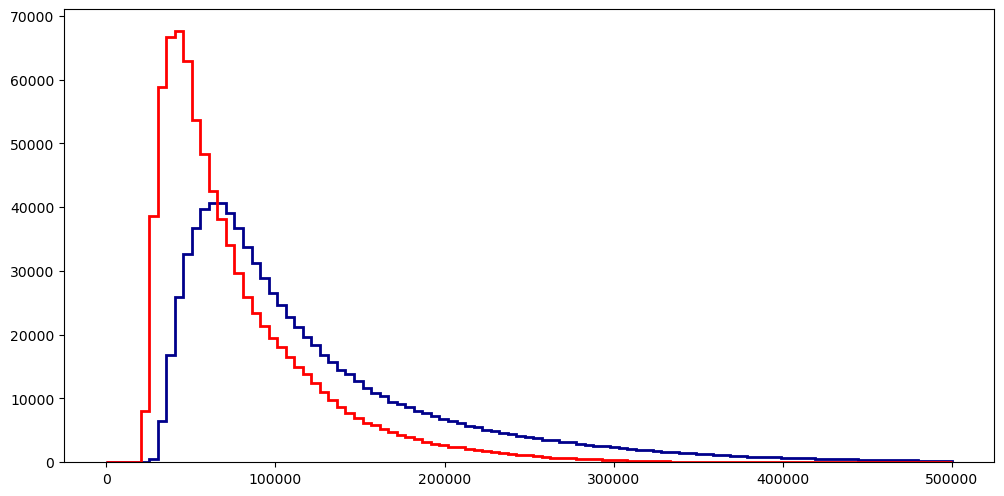

26771.2
22008.9


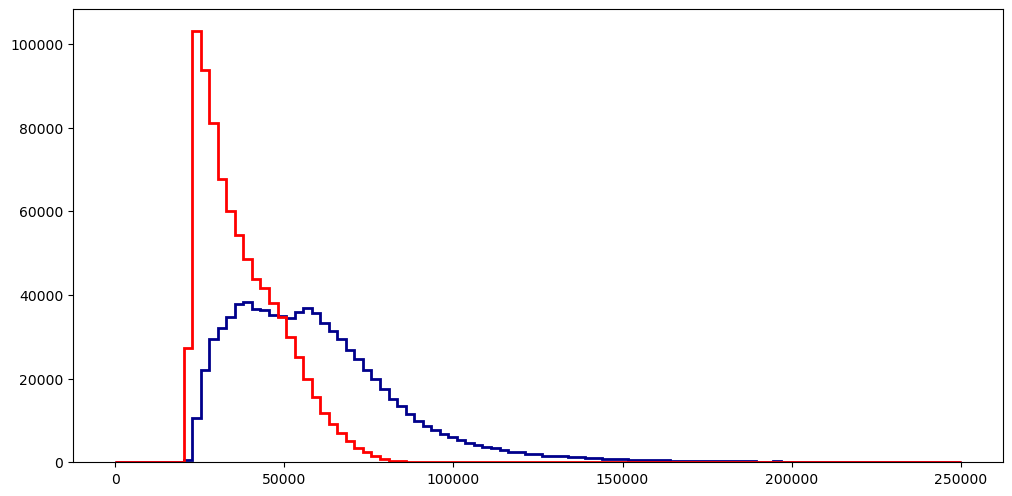

22017.9
22000.0


In [9]:
#for checking energy values
en1 = df3['g1_E'].values
en2 = df3['g2_E'].values
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 500000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(en1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(en2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

print(min(en1))
print(min(en2))

pt1 = df3['g1_pt'].values
pt2 = df3['g2_pt'].values
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 250000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(pt1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(pt2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

print(min(pt1))
print(min(pt2))

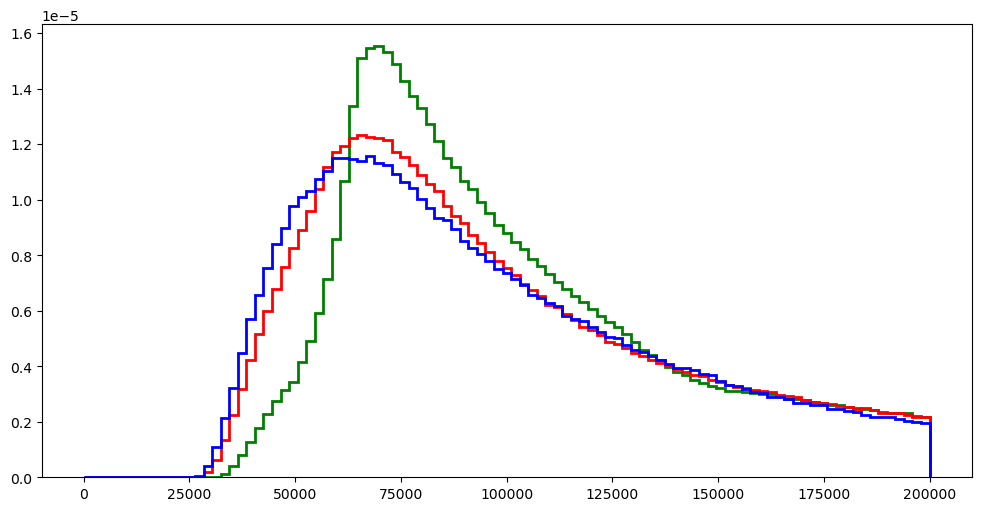

['label', 'p_mass', 'photon_sep', 'g1_pt', 'g1_eta', 'g1_phi', 'g1_E', 'g1_tight', 'g1_ptcone', 'g1_etcone', 'g2_pt', 'g2_eta', 'g2_phi', 'g2_E', 'g2_tight', 'g2_ptcone', 'g2_etcone', 'jet_n', 'j1_pt', 'j1_eta', 'j1_phi', 'j1_E', 'j1_BTAG', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_E', 'j2_BTAG']
['photon_sep', 'p_mass', 'g1_pt', 'g1_eta', 'g1_phi', 'g1_E', 'g1_tight', 'g1_ptcone', 'g1_etcone', 'g2_pt', 'g2_eta', 'g2_phi', 'g2_E', 'g2_tight', 'g2_ptcone', 'g2_etcone', 'jet_n', 'j1_pt', 'j1_eta', 'j1_phi', 'j1_E', 'j1_BTAG', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_E', 'j2_BTAG']


In [22]:
#Inspect the angle betwqeen photons
plt.figure(figsize=(12,6), dpi= 100)
data_del_r = df1['g1_E'].values
sig_del_r = df2['g1_E'].values
bkg_del_r = df3['g1_E'].values
# sigs = df1['j1_pt'][df1['label']==1].values
# bkgs = df2['j1_pt'][df2['label']==0].values
xlims=[100, 200000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
# plt.hist(bkgs, color = 'darkblue', histtype='step', bins=bins,linewidth=2)
# plt.hist(sigs, color = 'red', histtype='step', bins=bins,linewidth=2)
plt.hist(data_del_r, color = 'green', histtype='step', density=True, bins=bins,linewidth=2)
plt.hist(sig_del_r, color = 'red', histtype='step', density=True,bins=bins,linewidth=2)
plt.hist(bkg_del_r, color = 'blue', histtype='step', density=True,bins=bins,linewidth=2)
plt.show()
cols = df1.columns.tolist()
print(cols)
cols = df3.columns.tolist()
print(cols)

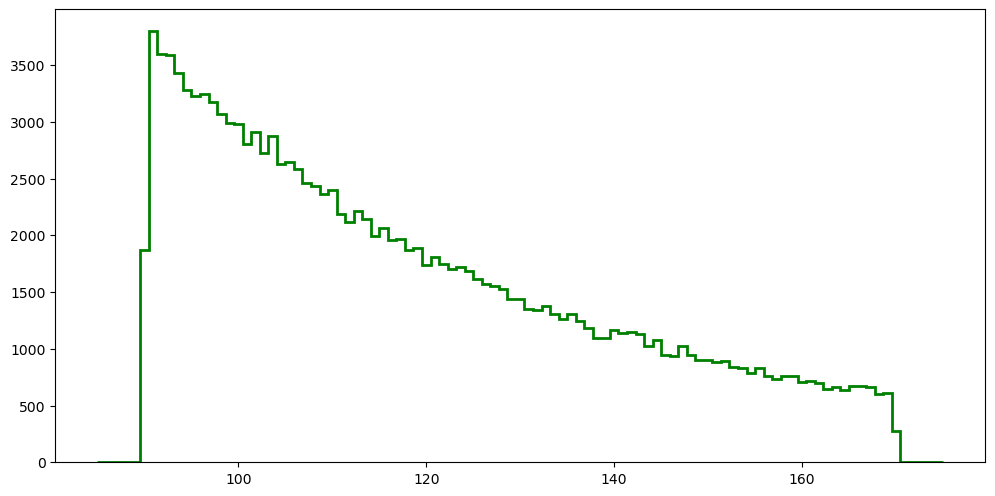

90.00003098816192
169.9986241565011


In [5]:
#Do a plot of the mass spectrum
plt.figure(figsize=(12,6), dpi= 100)
inv_m = df['p_mass'].values
# sigs = df['p_mass'][df['label']==1].values
# bkgs = df['p_mass'][df['label']==0].values

xlims=[85,175]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
# plt.hist(bkgs, color = 'darkblue', histtype='step', bins=bins,linewidth=2)
# plt.hist(sigs, color = 'red', histtype='step', bins=bins,linewidth=2)
plt.hist(inv_m, color = 'green', histtype='step', bins=bins,linewidth=2)
plt.show()

print(min(inv_m))
print(max(inv_m))